In [308]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
import warnings
warnings.filterwarnings('ignore')

In [371]:
# Load files
curr1 = pd.read_csv('CHFJPY.csv')
curr2 = pd.read_csv('USDCHF.csv')
curr3 = pd.read_csv('GBPAUD.csv') 
curr4 = pd.read_csv('USDJPY.csv') 

crypto1 = pd.read_csv('XRP.csv') 
crypto2 = pd.read_csv('Bitcoin.csv') 
crypto3 = pd.read_csv('Ethereum.csv') 

commod1 = pd.read_csv('Aluminum.csv') 
commod2 = pd.read_csv('Brent Oil.csv') 
commod3 = pd.read_csv('Carbon Emissions.csv') 



crypto3

# Preview train dataset


,Date,Open,High,Low,Close,Volume,Currency
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD
...,...,...,...,...,...,...,...
2292,2022-06-19,995.49,1152.07,938.24,1128.39,2424636,USD
2293,2022-06-20,1128.39,1165.62,1056.58,1128.32,2041874,USD
2294,2022-06-21,1128.29,1192.27,1110.63,1125.96,1601334,USD
2295,2022-06-22,1125.96,1127.06,1045.37,1049.02,1583077,USD


In [310]:
ticks=['Carbon Emissions','Brent Oil','Aluminum','CHFJPY','USDCHF','GBPAUD','USDJPY','Ethereum','Bitcoin','XRP']


In [311]:
data=pd.DataFrame()
for i in ticks:
    d=pd.read_csv("{j}.csv".format(j=i),index_col='Date',parse_dates=True)
    data[i]=d['Close']
data

,Carbon Emissions,Brent Oil,Aluminum,CHFJPY,USDCHF,GBPAUD,USDJPY,Ethereum,Bitcoin,XRP
Date,,,,,,,,,,
2015-01-02,7.01,56.42,1828.00,120.35,1.0013,1.8947,120.50,NaN,315.2,NaN
2015-01-05,6.90,53.11,1812.25,118.80,1.0071,1.8866,119.64,NaN,274.8,NaN
2015-01-06,6.77,51.10,1780.25,117.22,1.0101,1.8740,118.41,NaN,282.3,NaN
2015-01-07,6.78,51.15,1783.50,117.57,1.0144,1.8702,119.25,NaN,291.3,NaN
2015-01-08,6.81,50.96,1825.50,117.49,1.0186,1.8577,119.66,NaN,282.7,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-17,82.12,113.12,2498.00,139.12,0.9697,1.7615,134.96,1086.47,20444.6,0.32092
2022-06-20,84.01,114.13,2527.00,139.59,0.9673,1.7618,135.08,1128.32,20572.3,0.32242
2022-06-21,84.61,114.65,2533.50,141.37,0.9661,1.7613,136.61,1125.96,20720.4,0.32936


In [312]:
data.shape

(1922, 10)

In [313]:
np.isnan(data).sum()

Carbon Emissions      0
Brent Oil             0
Aluminum             34
CHFJPY                0
USDCHF                0
GBPAUD                0
USDJPY                0
Ethereum            305
Bitcoin               0
XRP                  14
dtype: int64

In [314]:
data=data.dropna()
data

,Carbon Emissions,Brent Oil,Aluminum,CHFJPY,USDCHF,GBPAUD,USDJPY,Ethereum,Bitcoin,XRP
Date,,,,,,,,,,
2016-03-10,4.90,40.05,1558.0,114.88,0.9849,1.9164,113.19,11.75,415.8,0.00820
2016-03-11,4.98,40.39,1560.0,115.72,0.9836,1.9009,113.81,11.95,419.1,0.00922
2016-03-14,4.85,39.53,1540.0,115.29,0.9873,1.9024,113.83,12.50,414.3,0.00830
2016-03-15,4.85,38.74,1520.0,114.65,0.9872,1.8980,113.19,13.06,415.1,0.00787
2016-03-16,4.95,40.33,1509.0,115.24,0.9770,1.8881,112.59,12.88,415.9,0.00819
...,...,...,...,...,...,...,...,...,...,...
2022-06-16,83.00,119.81,2504.5,136.71,0.9666,1.7523,132.20,1068.49,20386.6,0.31304
2022-06-17,82.12,113.12,2498.0,139.12,0.9697,1.7615,134.96,1086.47,20444.6,0.32092
2022-06-20,84.01,114.13,2527.0,139.59,0.9673,1.7618,135.08,1128.32,20572.3,0.32242


In [315]:
SD = data.std()
SD

Carbon Emissions       23.019256
Brent Oil              17.409430
Aluminum              438.734876
CHFJPY                  6.035554
USDCHF                  0.035006
GBPAUD                  0.085685
USDJPY                  5.048319
Ethereum             1159.015327
Bitcoin             17244.483620
XRP                     0.374044
dtype: float64

# XRP

In [317]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(crypto1['Close'].values.reshape(-1, 1))

In [318]:
dataset[0:100]


array([[0.00448776],
       [0.00448056],
       [0.0049812 ],
       [0.00484073],
       [0.00400873],
       [0.00430047],
       [0.00412038],
       [0.00358012],
       [0.00412038],
       [0.00411678],
       [0.00358733],
       [0.00349728],
       [0.00404835],
       [0.00376021],
       [0.00438331],
       [0.00430047],
       [0.00400513],
       [0.00386106],
       [0.00358012],
       [0.00399072],
       [0.00398352],
       [0.00386826],
       [0.00392229],
       [0.00303986],
       [0.00303986],
       [0.0041492 ],
       [0.00340364],
       [0.00411678],
       [0.00342525],
       [0.00342525],
       [0.00342525],
       [0.00342525],
       [0.00377102],
       [0.00355491],
       [0.00376021],
       [0.00340004],
       [0.00306147],
       [0.00296063],
       [0.00268329],
       [0.00109853],
       [0.00177926],
       [0.00303986],
       [0.00303986],
       [0.00246359],
       [0.00242757],
       [0.00224028],
       [0.00225108],
       [0.002

In [319]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2168 542


In [320]:
print(len(crypto1))


2710


In [321]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [322]:
x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5)

In [323]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2162, 5)
(2162,)
(536, 5)
(536,)


In [324]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [325]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2162, 1, 5)
(2162,)
(536, 1, 5)
(536,)


In [326]:
# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
2162/2162 - 12s - loss: 0.0020
Epoch 2/20
2162/2162 - 10s - loss: 3.9383e-04
Epoch 3/20
2162/2162 - 10s - loss: 3.3713e-04
Epoch 4/20
2162/2162 - 11s - loss: 3.0237e-04
Epoch 5/20
2162/2162 - 12s - loss: 2.5864e-04
Epoch 6/20
2162/2162 - 13s - loss: 3.0743e-04
Epoch 7/20
2162/2162 - 12s - loss: 2.3206e-04
Epoch 8/20
2162/2162 - 13s - loss: 2.7726e-04
Epoch 9/20
2162/2162 - 12s - loss: 2.6359e-04
Epoch 10/20
2162/2162 - 11s - loss: 2.6211e-04
Epoch 11/20
2162/2162 - 12s - loss: 2.7159e-04
Epoch 12/20
2162/2162 - 12s - loss: 2.5557e-04
Epoch 13/20
2162/2162 - 13s - loss: 2.5598e-04
Epoch 14/20
2162/2162 - 13s - loss: 2.4175e-04
Epoch 15/20
2162/2162 - 11s - loss: 2.4562e-04
Epoch 16/20
2162/2162 - 11s - loss: 2.4026e-04
Epoch 17/20
2162/2162 - 12s - loss: 2.2362e-04
Epoch 18/20
2162/2162 - 12s - loss: 2.5438e-04
Epoch 19/20
2162/2162 - 13s - loss: 2.5032e-04
Epoch 20/20
2162/2162 - 13s - loss: 2.3351e-04


In [46]:

'''model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2)) 





model.add(Dense(25))
model.add(Dense(1))
model.add(Activation('linear'))
'''

"model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(64, return_sequences=False))\nmodel.add(Dropout(0.2)) \n\n\n\n\n\nmodel.add(Dense(25))\nmodel.add(Dense(1))\nmodel.add(Activation('linear'))\n"

In [327]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.07 RMSE


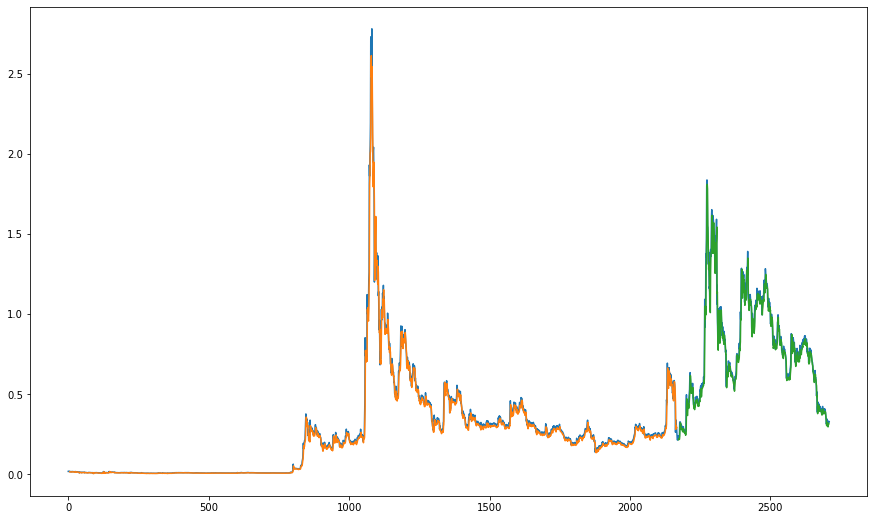

In [328]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (15 , 9))
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (2709, 1, 5).
trainY shape == (2709, 1).
Epoch 1/5
153/153 [==============================] - 2s 15ms/step - loss: 0.0259 - val_loss: 0.0077
Epoch 2/5
153/153 [==============================] - 2s 14ms/step - loss: 0.0133 - val_loss: 0.0033
Epoch 3/5
153/153 [==============================] - 2s 15ms/step - loss: 0.0090 - val_loss: 0.0012
Epoch 4/5
153/153 [==============================] - 2s 15ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 5/5
153/153 [==============================] - 2s 15ms/step - loss: 0.0051 - val_loss: 0.0029
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Close'>

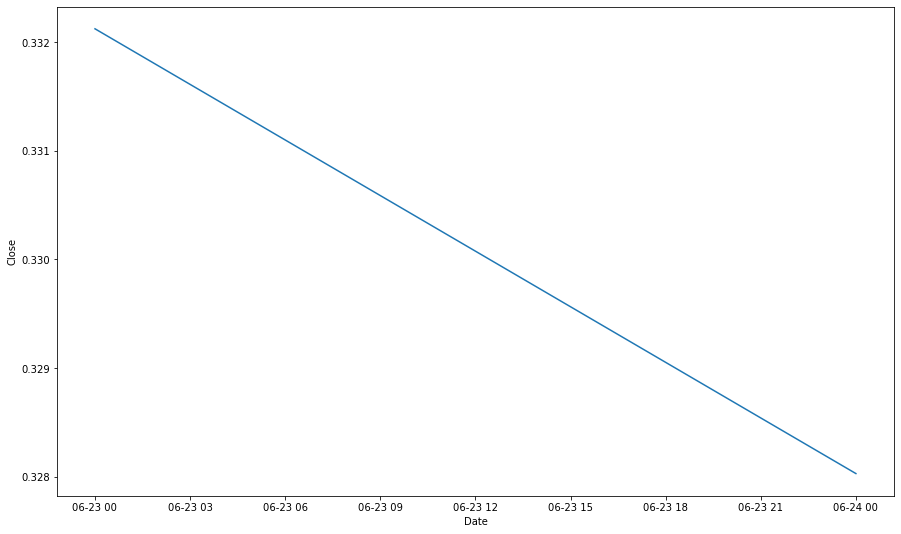

In [392]:


#forecasting 

from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 

cols = list(crypto1)[1:6]

df = crypto1

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-24']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])


In [393]:
y_pred_future

array([0.33212355, 0.32802856], dtype=float32)

In [394]:
print("la valeur prédite du XRP a la date 2022-06-24", y_pred_future[-1])

la valeur prédite du XRP a la date 2022-06-24 0.32802856


# Bitecoin 

In [343]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(crypto2['Close'].values.reshape(-1, 1))

In [344]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2184 547


In [345]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [346]:
x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5)

In [347]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2178, 5)
(2178,)
(541, 5)
(541,)


In [348]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [349]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2178, 1, 5)
(2178,)
(541, 1, 5)
(541,)


In [350]:
# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
2178/2178 - 13s - loss: 2.3849e-04
Epoch 2/20
2178/2178 - 11s - loss: 5.5847e-05
Epoch 3/20
2178/2178 - 11s - loss: 5.1838e-05
Epoch 4/20
2178/2178 - 11s - loss: 4.4037e-05
Epoch 5/20
2178/2178 - 11s - loss: 3.9777e-05
Epoch 6/20
2178/2178 - 11s - loss: 3.7676e-05
Epoch 7/20
2178/2178 - 11s - loss: 3.8209e-05
Epoch 8/20
2178/2178 - 11s - loss: 3.3477e-05
Epoch 9/20
2178/2178 - 11s - loss: 3.4696e-05
Epoch 10/20
2178/2178 - 12s - loss: 3.4910e-05
Epoch 11/20
2178/2178 - 11s - loss: 3.5722e-05
Epoch 12/20
2178/2178 - 12s - loss: 3.3892e-05
Epoch 13/20
2178/2178 - 13s - loss: 3.3455e-05
Epoch 14/20
2178/2178 - 13s - loss: 3.1292e-05
Epoch 15/20
2178/2178 - 13s - loss: 3.1693e-05
Epoch 16/20
2178/2178 - 13s - loss: 3.1431e-05
Epoch 17/20
2178/2178 - 11s - loss: 3.1699e-05
Epoch 18/20
2178/2178 - 11s - loss: 3.1042e-05
Epoch 19/20
2178/2178 - 12s - loss: 3.1338e-05
Epoch 20/20
2178/2178 - 11s - loss: 3.2329e-05


In [351]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 324.87 RMSE
Test Score: 3559.11 RMSE


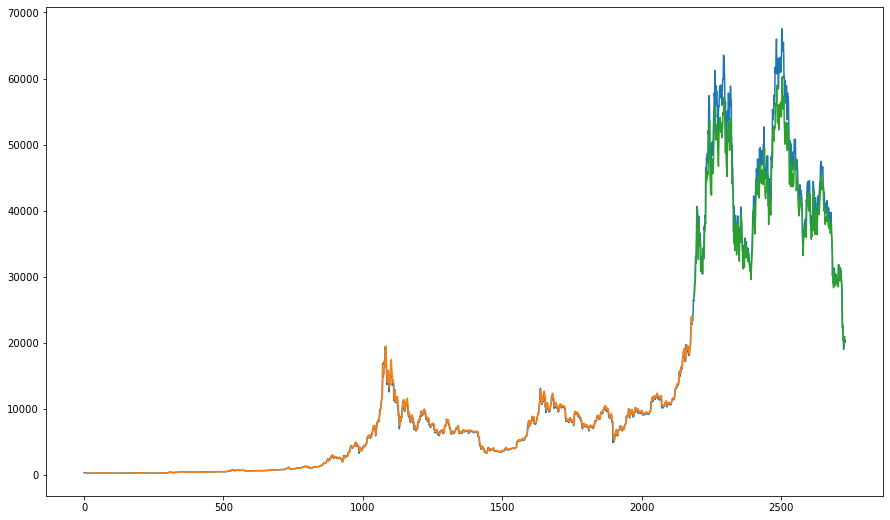

In [352]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (15 , 9))
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (2730, 1, 5).
trainY shape == (2730, 1).
Epoch 1/5
154/154 [==============================] - 2s 16ms/step - loss: 4.1388e-04 - val_loss: 0.0371
Epoch 2/5
154/154 [==============================] - 2s 15ms/step - loss: 3.5638e-04 - val_loss: 0.0401
Epoch 3/5
154/154 [==============================] - 2s 15ms/step - loss: 3.1965e-04 - val_loss: 0.0427
Epoch 4/5
154/154 [==============================] - 2s 15ms/step - loss: 3.0142e-04 - val_loss: 0.0402
Epoch 5/5
154/154 [==============================] - 2s 14ms/step - loss: 2.8604e-04 - val_loss: 0.0408
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Open'>

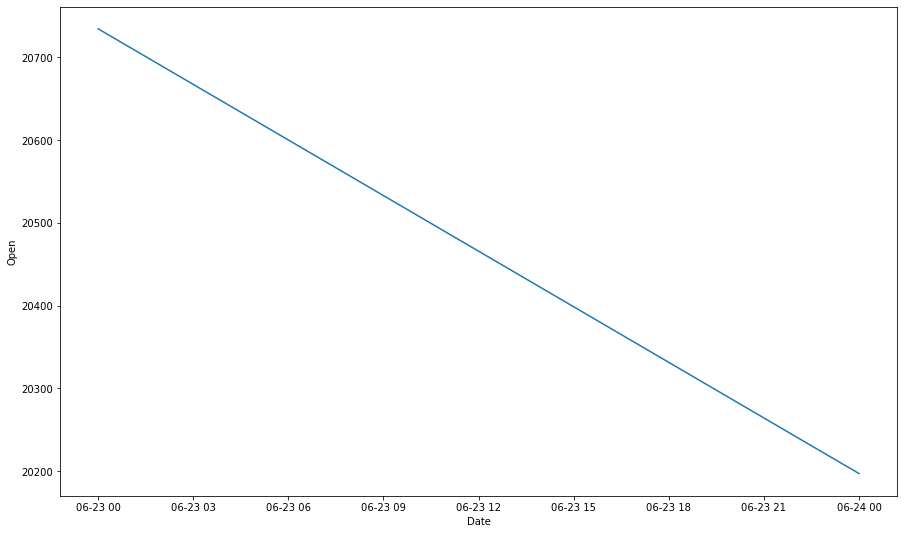

In [389]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 

cols = list(crypto1)[1:6]

df = crypto2

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
#sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])


In [390]:
y_pred_future

array([20734.643, 20196.842], dtype=float32)

In [391]:
print("la valeur prédite du Bitecoin a la date 2022-06-24", y_pred_future[-1])

la valeur prédite du Bitecoin a la date 2022-06-24 20196.842


# Ethereum

In [354]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(crypto3['Close'].values.reshape(-1, 1))

In [355]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1837 460


In [356]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [357]:
x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5)

In [358]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1831, 5)
(1831,)
(454, 5)
(454,)


In [359]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [360]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1831, 1, 5)
(1831,)
(454, 1, 5)
(454,)


In [361]:
# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1831/1831 - 10s - loss: 4.0085e-04
Epoch 2/20
1831/1831 - 9s - loss: 8.5926e-05
Epoch 3/20
1831/1831 - 9s - loss: 8.1595e-05
Epoch 4/20
1831/1831 - 9s - loss: 7.8265e-05
Epoch 5/20
1831/1831 - 9s - loss: 7.4682e-05
Epoch 6/20
1831/1831 - 10s - loss: 6.4206e-05
Epoch 7/20
1831/1831 - 11s - loss: 6.0641e-05
Epoch 8/20
1831/1831 - 11s - loss: 5.5549e-05
Epoch 9/20
1831/1831 - 10s - loss: 6.2718e-05
Epoch 10/20
1831/1831 - 11s - loss: 5.8578e-05
Epoch 11/20
1831/1831 - 10s - loss: 5.3279e-05
Epoch 12/20
1831/1831 - 10s - loss: 5.3164e-05
Epoch 13/20
1831/1831 - 10s - loss: 5.4672e-05
Epoch 14/20
1831/1831 - 10s - loss: 5.1136e-05
Epoch 15/20
1831/1831 - 10s - loss: 5.1274e-05
Epoch 16/20
1831/1831 - 10s - loss: 5.0777e-05
Epoch 17/20
1831/1831 - 10s - loss: 4.9034e-05
Epoch 18/20
1831/1831 - 10s - loss: 4.5698e-05
Epoch 19/20
1831/1831 - 10s - loss: 5.2203e-05
Epoch 20/20
1831/1831 - 10s - loss: 4.8530e-05


In [105]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.12 RMSE


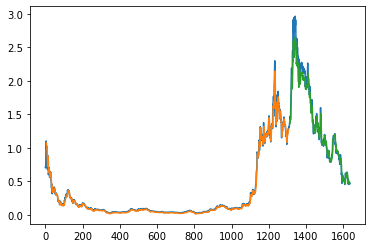

In [106]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (2296, 1, 5).
trainY shape == (2296, 1).
Epoch 1/5
130/130 [==============================] - 2s 14ms/step - loss: 0.0053 - val_loss: 0.0532
Epoch 2/5
130/130 [==============================] - 2s 16ms/step - loss: 0.0022 - val_loss: 0.0345
Epoch 3/5
130/130 [==============================] - 2s 15ms/step - loss: 0.0014 - val_loss: 0.0256
Epoch 4/5
130/130 [==============================] - 2s 16ms/step - loss: 0.0010 - val_loss: 0.0207
Epoch 5/5
130/130 [==============================] - 2s 14ms/step - loss: 8.1807e-04 - val_loss: 0.0177
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Open'>

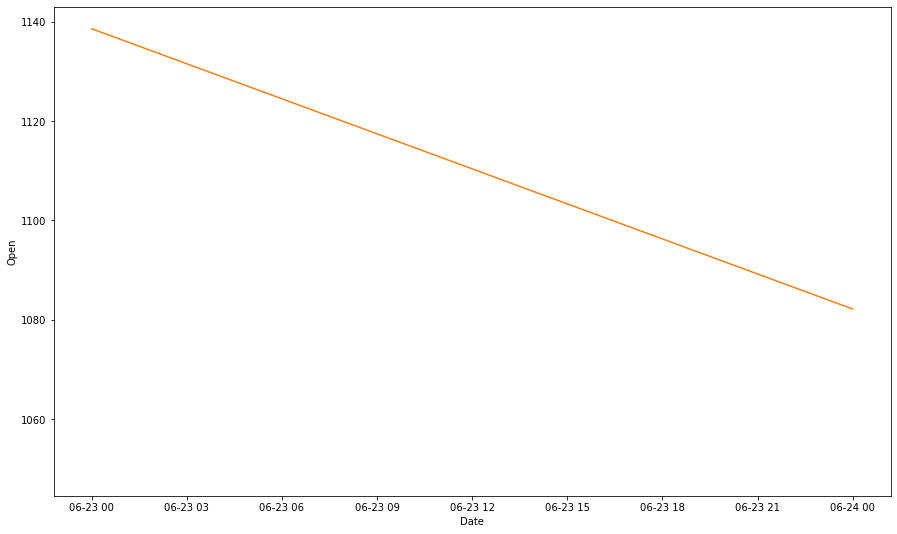

In [387]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = crypto3

cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])


In [388]:
y_pred_future

array([1138.5505, 1082.1456], dtype=float32)

In [374]:

print("la valeur prédite du Ethereum a la date 2022-06-24", y_pred_future[-1])

la valeur prédite du Ethereum a la date 2022-06-24 1084.5187


# Aluminuim 


In [375]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(commod1['Close'].values.reshape(-1, 1))

In [376]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1510 378


In [377]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [378]:
x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5)

In [379]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [380]:
# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1504/1504 - 9s - loss: 0.0015
Epoch 2/20
1504/1504 - 7s - loss: 1.7612e-04
Epoch 3/20
1504/1504 - 8s - loss: 1.5633e-04
Epoch 4/20
1504/1504 - 8s - loss: 1.3281e-04
Epoch 5/20
1504/1504 - 8s - loss: 1.2209e-04
Epoch 6/20
1504/1504 - 8s - loss: 1.0918e-04
Epoch 7/20
1504/1504 - 8s - loss: 1.0948e-04
Epoch 8/20
1504/1504 - 8s - loss: 1.0793e-04
Epoch 9/20
1504/1504 - 8s - loss: 1.0214e-04
Epoch 10/20
1504/1504 - 8s - loss: 1.0129e-04
Epoch 11/20
1504/1504 - 8s - loss: 9.7622e-05
Epoch 12/20
1504/1504 - 8s - loss: 1.0126e-04
Epoch 13/20
1504/1504 - 8s - loss: 1.0194e-04
Epoch 14/20
1504/1504 - 8s - loss: 1.0218e-04
Epoch 15/20
1504/1504 - 10s - loss: 9.9344e-05
Epoch 16/20
1504/1504 - 8s - loss: 9.7145e-05
Epoch 17/20
1504/1504 - 9s - loss: 9.8341e-05
Epoch 18/20
1504/1504 - 8s - loss: 9.3717e-05
Epoch 19/20
1504/1504 - 9s - loss: 9.6145e-05
Epoch 20/20
1504/1504 - 8s - loss: 1.0143e-04


In [381]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.98 RMSE
Test Score: 58.67 RMSE


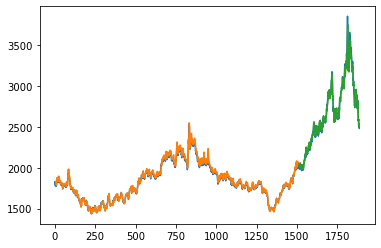

In [382]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (1887, 1, 5).
trainY shape == (1887, 1).
Epoch 1/5
107/107 [==============================] - 3s 17ms/step - loss: 0.0586 - val_loss: 0.4424
Epoch 2/5
107/107 [==============================] - ETA: 0s - loss: 0.007 - 2s 14ms/step - loss: 0.0079 - val_loss: 0.4764
Epoch 3/5
107/107 [==============================] - 2s 15ms/step - loss: 0.0056 - val_loss: 0.4680
Epoch 4/5
107/107 [==============================] - 2s 15ms/step - loss: 0.0048 - val_loss: 0.4427
Epoch 5/5
107/107 [==============================] - 1s 14ms/step - loss: 0.0043 - val_loss: 0.4084
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Open'>

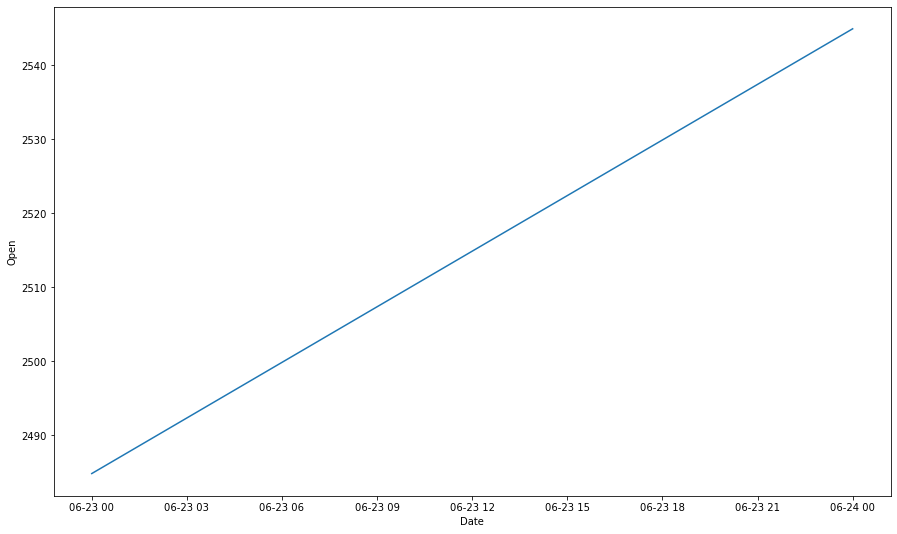

In [384]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = commod1

cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])


In [386]:
y_pred_future[-1]#la valeur prédite au date 24-06-2022

2544.9033

# Carbon Emissions

1537 385
Epoch 1/20
1531/1531 - 11s - loss: 4.4966e-04
Epoch 2/20
1531/1531 - 8s - loss: 6.6105e-05
Epoch 3/20
1531/1531 - 8s - loss: 6.6239e-05
Epoch 4/20
1531/1531 - 8s - loss: 5.7960e-05
Epoch 5/20
1531/1531 - 8s - loss: 5.7444e-05
Epoch 6/20
1531/1531 - 8s - loss: 5.6361e-05
Epoch 7/20
1531/1531 - 8s - loss: 4.8497e-05
Epoch 8/20
1531/1531 - 8s - loss: 4.6200e-05
Epoch 9/20
1531/1531 - 8s - loss: 4.6269e-05
Epoch 10/20
1531/1531 - 8s - loss: 4.8076e-05
Epoch 11/20
1531/1531 - 8s - loss: 4.3957e-05
Epoch 12/20
1531/1531 - 8s - loss: 4.5198e-05
Epoch 13/20
1531/1531 - 8s - loss: 4.3583e-05
Epoch 14/20
1531/1531 - 8s - loss: 4.1075e-05
Epoch 15/20
1531/1531 - 8s - loss: 4.1439e-05
Epoch 16/20
1531/1531 - 8s - loss: 4.1718e-05
Epoch 17/20
1531/1531 - 8s - loss: 4.1360e-05
Epoch 18/20
1531/1531 - 8s - loss: 3.9384e-05
Epoch 19/20
1531/1531 - 8s - loss: 4.0240e-05
Epoch 20/20
1531/1531 - 8s - loss: 4.1846e-05
Train Score: 0.51 RMSE
Test Score: 7.45 RMSE


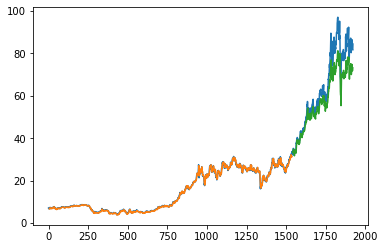

In [395]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(commod3['Close'].values.reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5) 

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) 


# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2) 

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (1921, 1, 5).
trainY shape == (1921, 1).
Epoch 1/5
108/108 [==============================] - 2s 10ms/step - loss: 0.0481 - val_loss: 0.1662
Epoch 2/5
108/108 [==============================] - 1s 7ms/step - loss: 0.0028 - val_loss: 0.1359
Epoch 3/5
108/108 [==============================] - 1s 7ms/step - loss: 0.0019 - val_loss: 0.1270
Epoch 4/5
108/108 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 0.0941
Epoch 5/5
108/108 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.1030
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Close'>

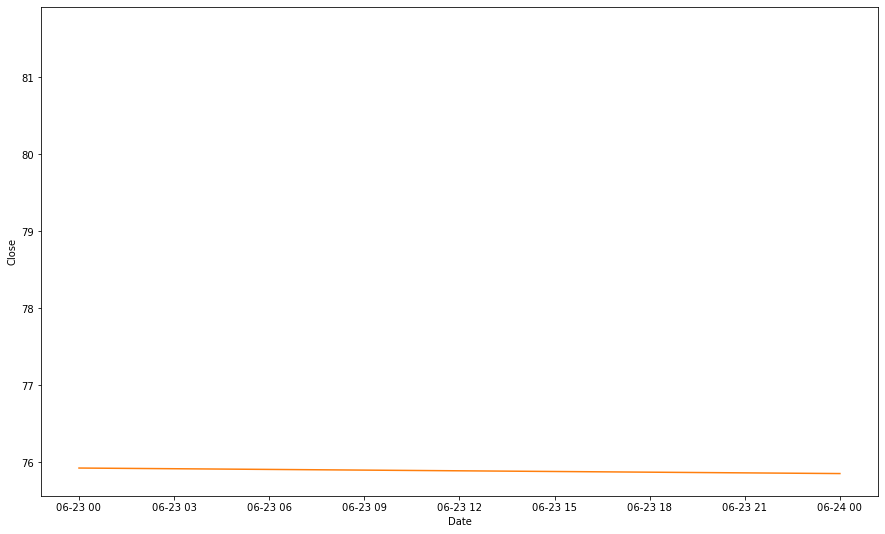

In [396]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = commod3

cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])


In [398]:
y_pred_future[-1]#la valeur prédite au date 24-06-2022

75.85062

# Brent Oil

1545 387
Epoch 1/20
1539/1539 - 9s - loss: 0.0028
Epoch 2/20
1539/1539 - 7s - loss: 3.0101e-04
Epoch 3/20
1539/1539 - 8s - loss: 2.7372e-04
Epoch 4/20
1539/1539 - 8s - loss: 2.6390e-04
Epoch 5/20
1539/1539 - 8s - loss: 2.3183e-04
Epoch 6/20
1539/1539 - 7s - loss: 2.2498e-04
Epoch 7/20
1539/1539 - 8s - loss: 2.0759e-04
Epoch 8/20
1539/1539 - 7s - loss: 2.0408e-04
Epoch 9/20
1539/1539 - 8s - loss: 2.0437e-04
Epoch 10/20
1539/1539 - 8s - loss: 2.0319e-04
Epoch 11/20
1539/1539 - 8s - loss: 1.8896e-04
Epoch 12/20
1539/1539 - 8s - loss: 1.8557e-04
Epoch 13/20
1539/1539 - 8s - loss: 1.8585e-04
Epoch 14/20
1539/1539 - 8s - loss: 1.8383e-04
Epoch 15/20
1539/1539 - 8s - loss: 1.8280e-04
Epoch 16/20
1539/1539 - 8s - loss: 1.8601e-04
Epoch 17/20
1539/1539 - 9s - loss: 1.8188e-04
Epoch 18/20
1539/1539 - 8s - loss: 1.7768e-04
Epoch 19/20
1539/1539 - 9s - loss: 1.8008e-04
Epoch 20/20
1539/1539 - 8s - loss: 1.7387e-04
Train Score: 1.38 RMSE
Test Score: 3.23 RMSE


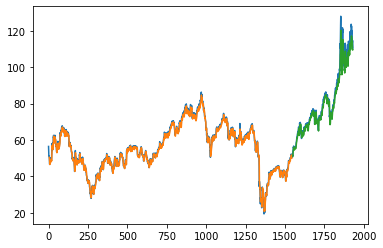

In [399]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(commod2['Close'].values.reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5) 

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) 


# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2) 

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (1931, 1, 5).
trainY shape == (1931, 1).
Epoch 1/5
109/109 [==============================] - 3s 17ms/step - loss: 0.1149 - val_loss: 2.3053
Epoch 2/5
109/109 [==============================] - 2s 14ms/step - loss: 0.0126 - val_loss: 1.8369
Epoch 3/5
109/109 [==============================] - 2s 14ms/step - loss: 0.0068 - val_loss: 1.6760
Epoch 4/5
109/109 [==============================] - 1s 13ms/step - loss: 0.0042 - val_loss: 1.5218
Epoch 5/5
109/109 [==============================] - 2s 14ms/step - loss: 0.0030 - val_loss: 1.3827
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Close'>

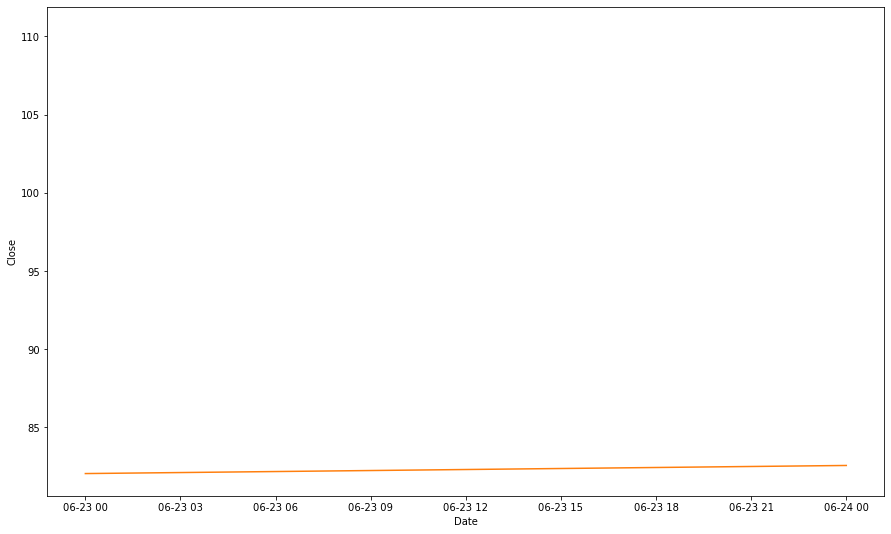

In [400]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = commod2

cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])


In [402]:
y_pred_future[-1]#la valeur prédite au date 24-06-2022

82.56139

# CHFJPY

1560 391
Epoch 1/20
1554/1554 - 9s - loss: 0.0051
Epoch 2/20
1554/1554 - 9s - loss: 8.8523e-04
Epoch 3/20
1554/1554 - 10s - loss: 7.8392e-04
Epoch 4/20
1554/1554 - 10s - loss: 6.5982e-04
Epoch 5/20
1554/1554 - 10s - loss: 6.0639e-04
Epoch 6/20
1554/1554 - 9s - loss: 5.7170e-04
Epoch 7/20
1554/1554 - 10s - loss: 5.2011e-04
Epoch 8/20
1554/1554 - 10s - loss: 5.2717e-04
Epoch 9/20
1554/1554 - 9s - loss: 5.0999e-04
Epoch 10/20
1554/1554 - 9s - loss: 4.8993e-04
Epoch 11/20
1554/1554 - 10s - loss: 4.8707e-04
Epoch 12/20
1554/1554 - 11s - loss: 5.0720e-04
Epoch 13/20
1554/1554 - 10s - loss: 4.7692e-04
Epoch 14/20
1554/1554 - 9s - loss: 4.9105e-04
Epoch 15/20
1554/1554 - 10s - loss: 4.7917e-04
Epoch 16/20
1554/1554 - 10s - loss: 4.8167e-04
Epoch 17/20
1554/1554 - 9s - loss: 4.7958e-04
Epoch 18/20
1554/1554 - 10s - loss: 4.4873e-04
Epoch 19/20
1554/1554 - 9s - loss: 4.7131e-04
Epoch 20/20
1554/1554 - 9s - loss: 4.7402e-04
Train Score: 0.79 RMSE
Test Score: 0.69 RMSE


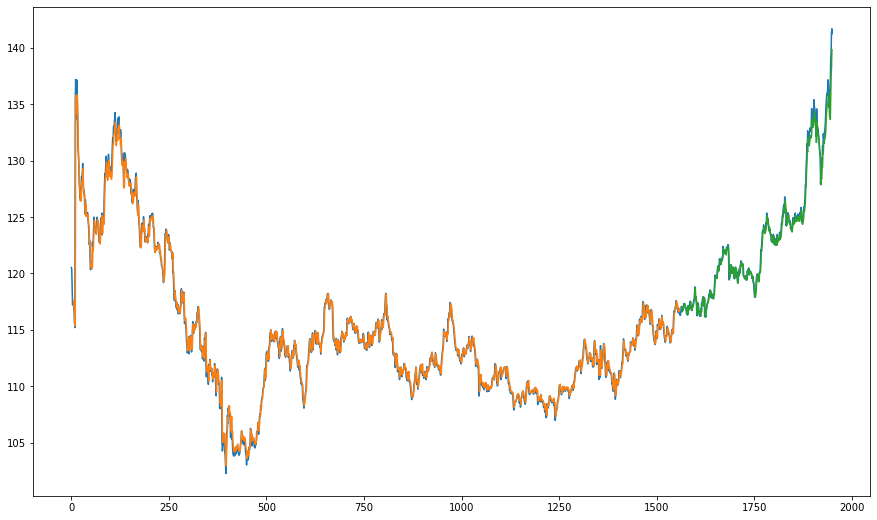

In [403]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(curr1['Close'].values.reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5) 

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) 


# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2) 

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (15 , 9))
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (1950, 1, 5).
trainY shape == (1950, 1).
Epoch 1/5
117/117 [==============================] - 2s 9ms/step - loss: 0.0516 - val_loss: 0.0423
Epoch 2/5
117/117 [==============================] - 1s 8ms/step - loss: 0.0042 - val_loss: 0.0217
Epoch 3/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0026 - val_loss: 0.0182
Epoch 4/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0021 - val_loss: 0.0109
Epoch 5/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0018 - val_loss: 0.0115
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Close'>

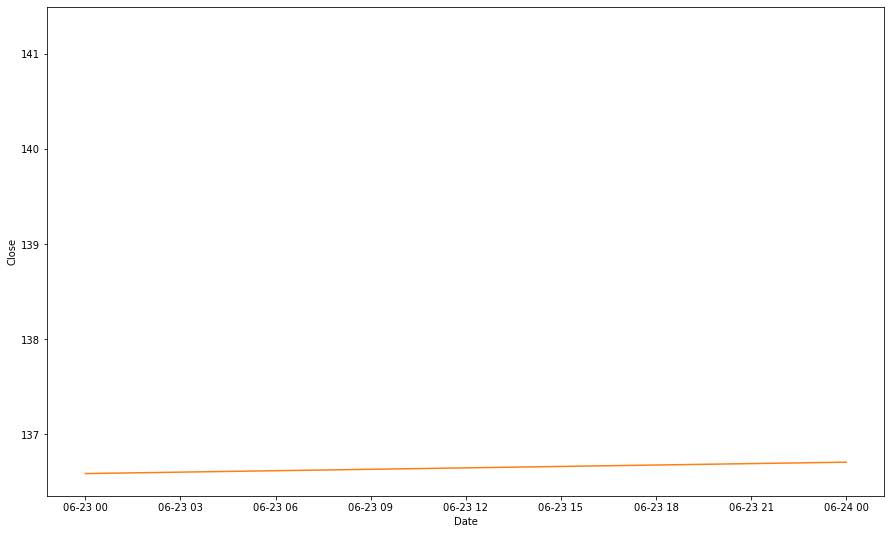

In [404]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = curr1

df['Currency']=0
cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 4. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=15, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])


In [405]:
y_pred_future[-1]#la valeur prédite au date 24-06-2022

136.70706

# USDCHF

1560 391
Epoch 1/20
1554/1554 - 10s - loss: 0.0116
Epoch 2/20
1554/1554 - 9s - loss: 0.0027
Epoch 3/20
1554/1554 - 9s - loss: 0.0022
Epoch 4/20
1554/1554 - 9s - loss: 0.0020
Epoch 5/20
1554/1554 - 10s - loss: 0.0018
Epoch 6/20
1554/1554 - 10s - loss: 0.0018
Epoch 7/20
1554/1554 - 9s - loss: 0.0017
Epoch 8/20
1554/1554 - 9s - loss: 0.0017
Epoch 9/20
1554/1554 - 9s - loss: 0.0016
Epoch 10/20
1554/1554 - 10s - loss: 0.0016
Epoch 11/20
1554/1554 - 10s - loss: 0.0016
Epoch 12/20
1554/1554 - 9s - loss: 0.0016
Epoch 13/20
1554/1554 - 9s - loss: 0.0016
Epoch 14/20
1554/1554 - 10s - loss: 0.0016
Epoch 15/20
1554/1554 - 9s - loss: 0.0016
Epoch 16/20
1554/1554 - 10s - loss: 0.0016
Epoch 17/20
1554/1554 - 8s - loss: 0.0015
Epoch 18/20
1554/1554 - 9s - loss: 0.0015
Epoch 19/20
1554/1554 - 9s - loss: 0.0015
Epoch 20/20
1554/1554 - 9s - loss: 0.0015
Train Score: 0.01 RMSE
Test Score: 0.00 RMSE


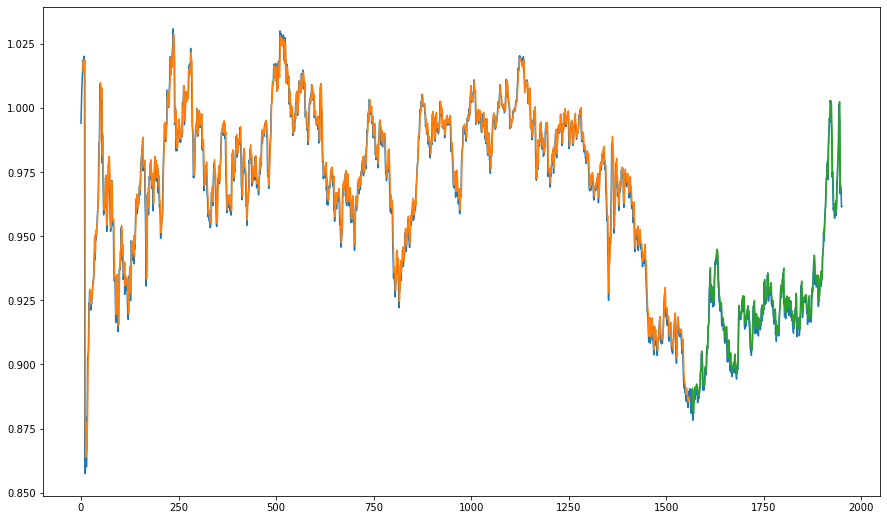

In [406]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(curr2['Close'].values.reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5) 

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) 


# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2) 

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (15 , 9))
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (1950, 1, 5).
trainY shape == (1950, 1).
Epoch 1/5
117/117 [==============================] - 2s 11ms/step - loss: 0.0842 - val_loss: 0.0126
Epoch 2/5
117/117 [==============================] - 1s 8ms/step - loss: 0.0107 - val_loss: 0.0047
Epoch 3/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0059 - val_loss: 0.0043
Epoch 4/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 5/5
117/117 [==============================] - 1s 8ms/step - loss: 0.0030 - val_loss: 0.0020
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Open'>

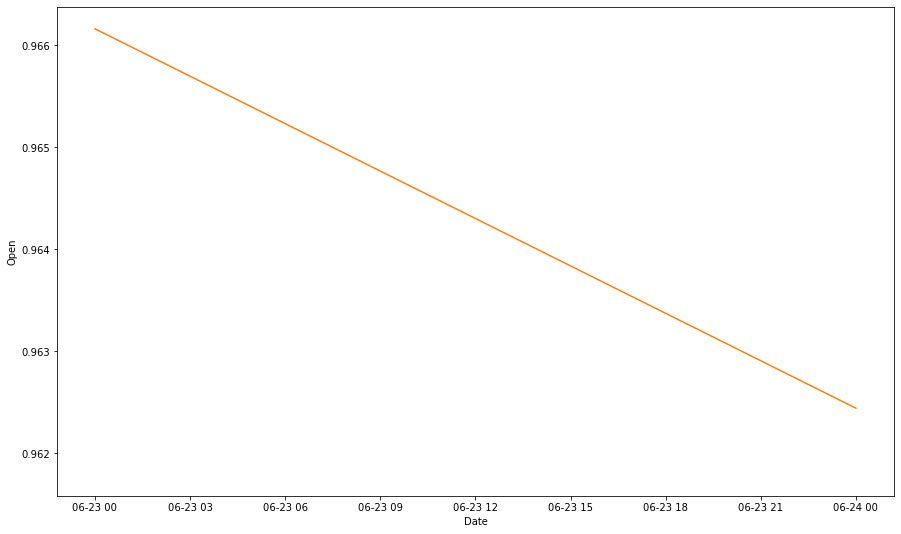

In [407]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = curr2

df['Currency']=0
cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 4. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=15, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])


In [408]:
y_pred_future[-1]

0.96244156

# GBPAUD

1560 391
Epoch 1/20
1554/1554 - 9s - loss: 0.0055
Epoch 2/20
1554/1554 - 8s - loss: 8.8141e-04
Epoch 3/20
1554/1554 - 8s - loss: 8.1127e-04
Epoch 4/20
1554/1554 - 8s - loss: 7.2254e-04
Epoch 5/20
1554/1554 - 8s - loss: 6.2465e-04
Epoch 6/20
1554/1554 - 8s - loss: 5.7892e-04
Epoch 7/20
1554/1554 - 8s - loss: 5.6566e-04
Epoch 8/20
1554/1554 - 9s - loss: 5.6980e-04
Epoch 9/20
1554/1554 - 8s - loss: 5.1700e-04
Epoch 10/20
1554/1554 - 8s - loss: 5.0188e-04
Epoch 11/20
1554/1554 - 8s - loss: 5.1716e-04
Epoch 12/20
1554/1554 - 8s - loss: 5.1691e-04
Epoch 13/20
1554/1554 - 9s - loss: 4.8573e-04
Epoch 14/20
1554/1554 - 9s - loss: 4.8890e-04
Epoch 15/20
1554/1554 - 8s - loss: 4.9280e-04
Epoch 16/20
1554/1554 - 10s - loss: 4.8299e-04
Epoch 17/20
1554/1554 - 10s - loss: 4.8366e-04
Epoch 18/20
1554/1554 - 8s - loss: 4.9860e-04
Epoch 19/20
1554/1554 - 8s - loss: 4.6875e-04
Epoch 20/20
1554/1554 - 8s - loss: 4.7869e-04
Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


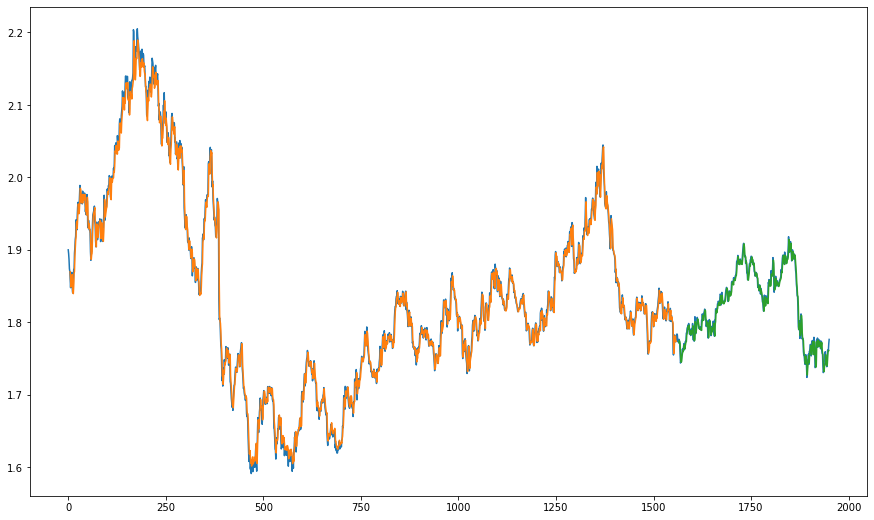

In [409]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(curr3['Close'].values.reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5) 

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) 


# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2) 

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions 
plt.figure(figsize = (15 , 9))
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (1950, 1, 5).
trainY shape == (1950, 1).
Epoch 1/5
117/117 [==============================] - 3s 18ms/step - loss: 0.0209 - val_loss: 0.0012
Epoch 2/5
117/117 [==============================] - 2s 17ms/step - loss: 0.0021 - val_loss: 7.1086e-04
Epoch 3/5
117/117 [==============================] - 2s 16ms/step - loss: 0.0014 - val_loss: 6.5792e-04
Epoch 4/5
117/117 [==============================] - 2s 16ms/step - loss: 0.0012 - val_loss: 6.1420e-04
Epoch 5/5
117/117 [==============================] - 2s 16ms/step - loss: 0.0011 - val_loss: 5.9320e-04
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Close'>

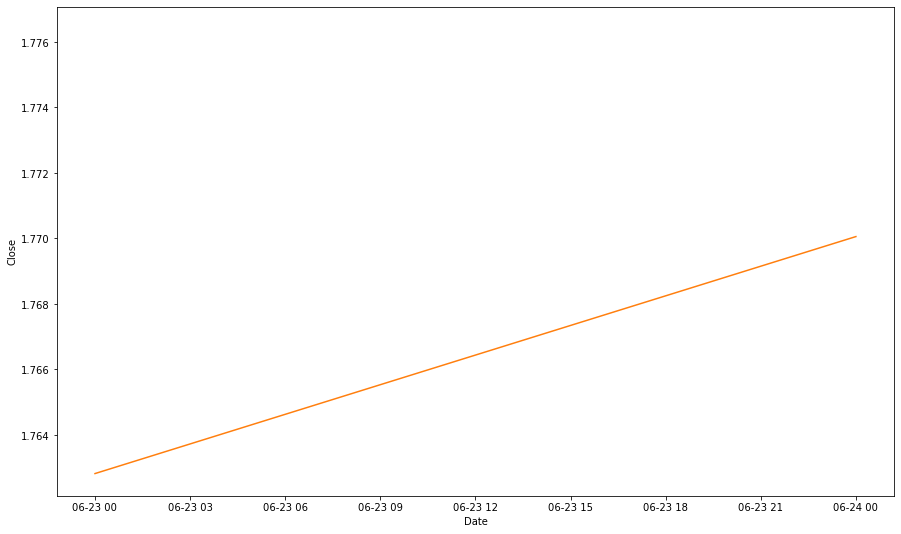

In [411]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = curr3

df['Currency']=0
cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 4. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=15, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])


In [412]:
y_pred_future[-1]#la valeur prédite au date 24-06-2022

1.7700555

# USDJPY

1560 391
Epoch 1/20
1554/1554 - 9s - loss: 0.0043
Epoch 2/20
1554/1554 - 8s - loss: 5.9771e-04
Epoch 3/20
1554/1554 - 8s - loss: 5.1898e-04
Epoch 4/20
1554/1554 - 8s - loss: 4.5399e-04
Epoch 5/20
1554/1554 - 9s - loss: 4.2599e-04
Epoch 6/20
1554/1554 - 9s - loss: 3.9756e-04
Epoch 7/20
1554/1554 - 8s - loss: 3.6423e-04
Epoch 8/20
1554/1554 - 9s - loss: 3.6704e-04
Epoch 9/20
1554/1554 - 9s - loss: 3.5040e-04
Epoch 10/20
1554/1554 - 9s - loss: 3.5018e-04
Epoch 11/20
1554/1554 - 9s - loss: 3.3958e-04
Epoch 12/20
1554/1554 - 9s - loss: 3.2989e-04
Epoch 13/20
1554/1554 - 9s - loss: 3.4551e-04
Epoch 14/20
1554/1554 - 10s - loss: 3.3799e-04
Epoch 15/20
1554/1554 - 9s - loss: 3.2725e-04
Epoch 16/20
1554/1554 - 10s - loss: 3.4085e-04
Epoch 17/20
1554/1554 - 10s - loss: 3.1906e-04
Epoch 18/20
1554/1554 - 10s - loss: 3.3013e-04
Epoch 19/20
1554/1554 - 9s - loss: 3.2893e-04
Epoch 20/20
1554/1554 - 9s - loss: 3.2201e-04
Train Score: 0.65 RMSE
Test Score: 0.76 RMSE


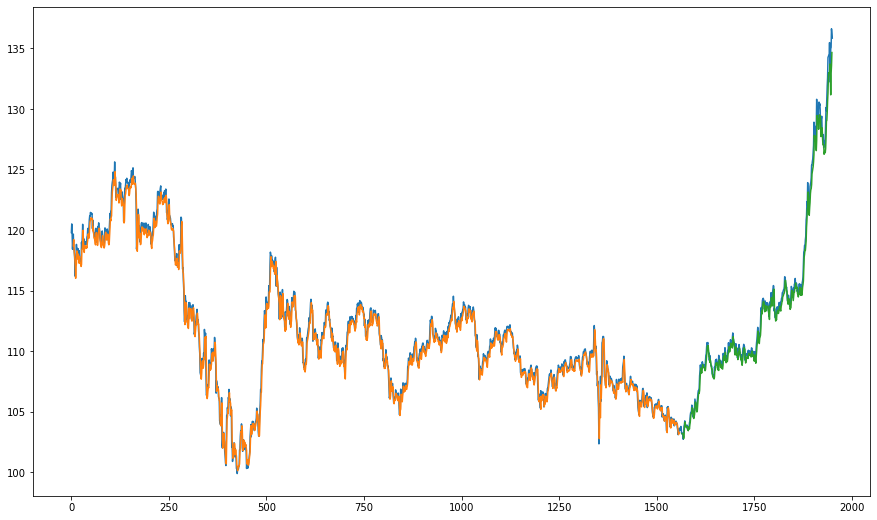

In [413]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(curr4['Close'].values.reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


x_train, y_train = create_dataset(train, look_back=5)
x_test, y_test = create_dataset(test, look_back=5) 

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) 


# create and fit the LSTM network
look_back=5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2) 

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (15 , 9))
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

2695   2022-06-09
2696   2022-06-10
2697   2022-06-11
2698   2022-06-12
2699   2022-06-13
2700   2022-06-14
2701   2022-06-15
2702   2022-06-16
2703   2022-06-17
2704   2022-06-18
2705   2022-06-19
2706   2022-06-20
2707   2022-06-21
2708   2022-06-22
2709   2022-06-23
Name: Date, dtype: datetime64[ns]
trainX shape == (1950, 1, 5).
trainY shape == (1950, 1).
Epoch 1/5
117/117 [==============================] - 2s 9ms/step - loss: 0.0592 - val_loss: 0.1702
Epoch 2/5
117/117 [==============================] - 1s 8ms/step - loss: 0.0043 - val_loss: 0.1426
Epoch 3/5
117/117 [==============================] - 1s 8ms/step - loss: 0.0023 - val_loss: 0.1124
Epoch 4/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 0.1017
Epoch 5/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0991
[Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C')]


<AxesSubplot:xlabel='Date', ylabel='Close'>

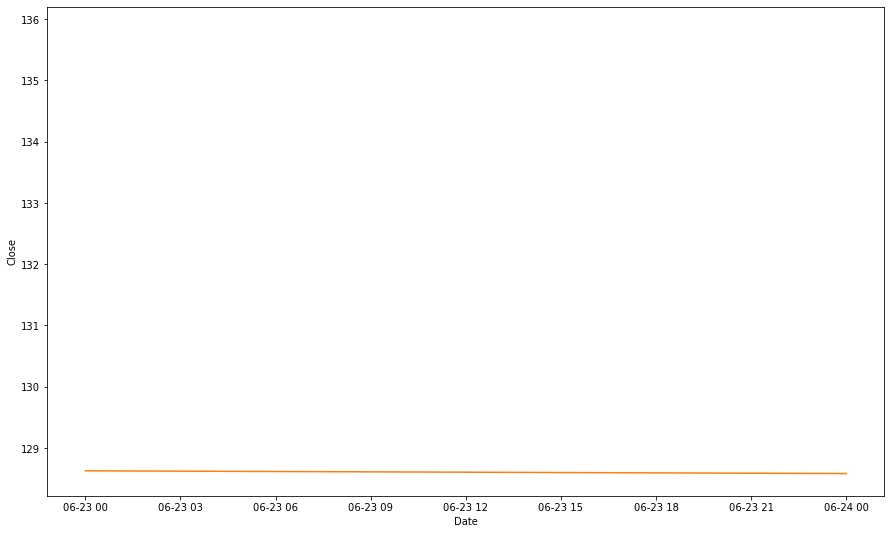

In [414]:
from sklearn.preprocessing import StandardScaler 
import seaborn as sns



train_dates = pd.to_datetime(crypto1['Date'])
print(train_dates.tail(15)) #Check last few dates. 


df = curr4

df['Currency']=0
cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 4. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future. 

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

history = model.fit(trainX, trainY, epochs=5, batch_size=15, validation_split=0.1, verbose=1) 


#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=2

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-23']
plt.figure(figsize=(15,9))
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])


In [415]:
y_pred_future[-1]#la valeur prédite au date 24-06-2022

128.58322